In [0]:
from __future__ import absolute_import, division, print_function  # Python 2/3 compatibility
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import os

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [6]:

from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Using TensorFlow backend.


In [0]:
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df = pd.read_csv("diabetes.csv")


In [15]:
print(diabetes_df.head())
print(diabetes_df.columns)
# Take a peek at the data -- if there are lots of "NaN" you may have internet connectivity issues
print(diabetes_df.shape)
diabetes_df.sample(5)

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
636,5,104,74,0,0,28.8,0.153,48,0
744,13,153,88,37,140,40.6,1.174,39,0
307,0,137,68,14,148,24.8,0.143,21,0
686,3,130,64,0,0,23.1,0.314,22,0
361,5,158,70,0,0,29.8,0.207,63,0


0.3489583333333333 0.6510416666666666
accuracy is 0.771
roc-auc is 0.834


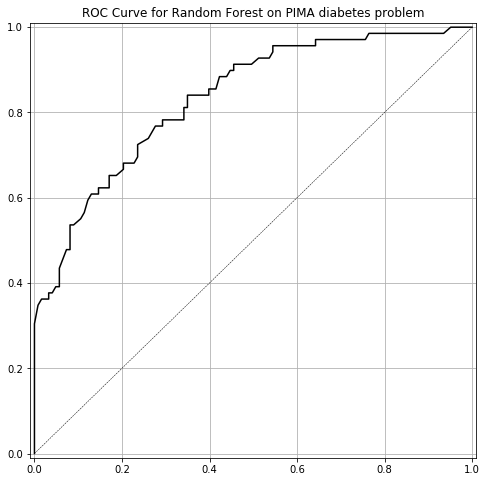




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 576 samples, validate on 192 samples
Epoch 1/200
576/576 [==============================] - 1s 1ms/step - loss: 0.7252 - acc: 0.5972 - val_loss: 0.7614 - val_acc: 0.5677
Epoch 2/200
576/576 [==============================] - 0s 45us/step - loss: 0.7211 - acc: 0.6024 - val_loss: 0.7565 - val_acc: 0.5729
Epoch 3/200
576/576 [==============================] - 0s 46us/step - loss: 0.7170 - acc: 0.6024 - val_lo

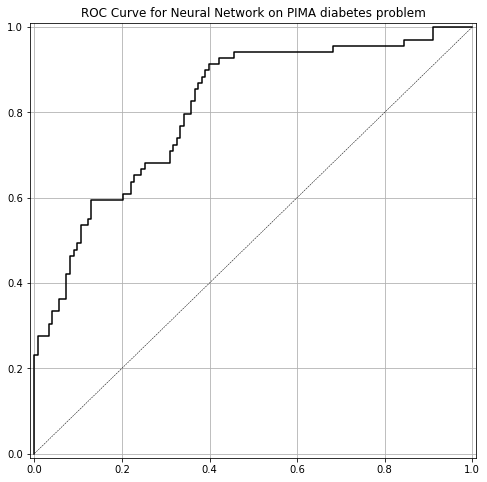

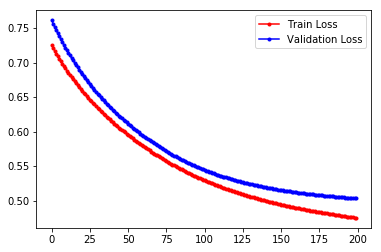

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 61us/step - loss: 0.4746 - acc: 0.7656 - val_loss: 0.5031 - val_acc: 0.7552
Epoch 2/1000
576/576 [==============================] - 0s 54us/step - loss: 0.4743 - acc: 0.7656 - val_loss: 0.5029 - val_acc: 0.7552
Epoch 3/1000
576/576 [==============================] - 0s 46us/step - loss: 0.4739 - acc: 0.7656 - val_loss: 0.5028 - val_acc: 0.7552
Epoch 4/1000
576/576 [==============================] - 0s 45us/step - loss: 0.4737 - acc: 0.7656 - val_loss: 0.5026 - val_acc: 0.7604
Epoch 5/1000
576/576 [==============================] - 0s 48us/step - loss: 0.4734 - acc: 0.7656 - val_loss: 0.5025 - val_acc: 0.7604
Epoch 6/1000
576/576 [==============================] - 0s 46us/step - loss: 0.4731 - acc: 0.7656 - val_loss: 0.5024 - val_acc: 0.7604
Epoch 7/1000
576/576 [==============================] - 0s 47us/step - loss: 0.4728 - acc: 0.7656 - val_loss: 0.5022 - val_acc: 0.7604
Epoch 8/1

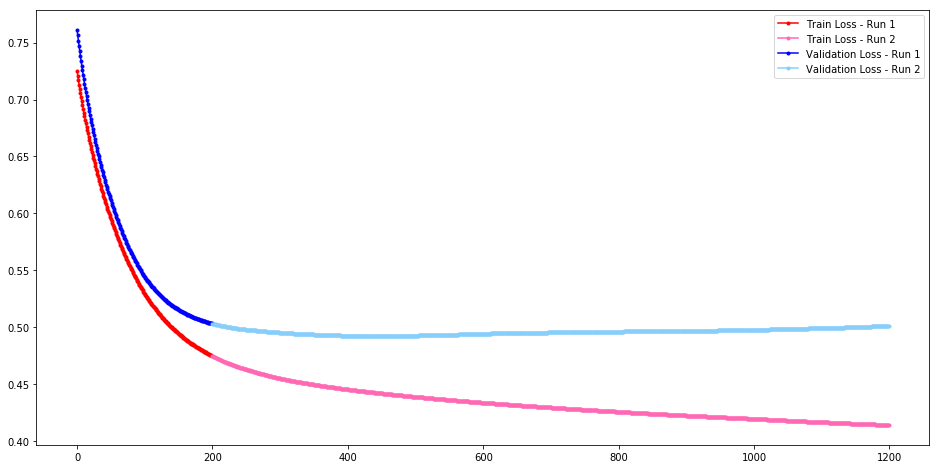

Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 0s 330us/step - loss: 0.7386 - acc: 0.5399 - val_loss: 0.7221 - val_acc: 0.6094
Epoch 2/1500
576/576 [==============================] - 0s 45us/step - loss: 0.7309 - acc: 0.5503 - val_loss: 0.7135 - val_acc: 0.6146
Epoch 3/1500
576/576 [==============================] - 0s 40us/step - loss: 0.7237 - acc: 0.5590 - val_loss: 0.7053 - val_acc: 0.6198
Epoch 4/1500
576/576 [==============================] - 0s 39us/step - loss: 0.7169 - acc: 0.5712 - val_loss: 0.6979 - val_acc: 0.6250
Epoch 5/1500
576/576 [==============================] - 0s 49us/step - loss: 0.7105 - acc: 0.5781 - val_loss: 0.6909 - val_acc: 0.6458
Epoch 6/1500
576/576 [==============================] - 0s 50us/step - loss: 0.7046 - acc: 0.5833 - val_loss: 0.6843 - val_acc: 0.6510
Epoch 7/1500
576/576 [==============================] - 0s 51us/step - loss: 0.6990 - acc: 0.5885 - val_loss: 0.6783 - val_acc: 0.6615
Epoch 8/

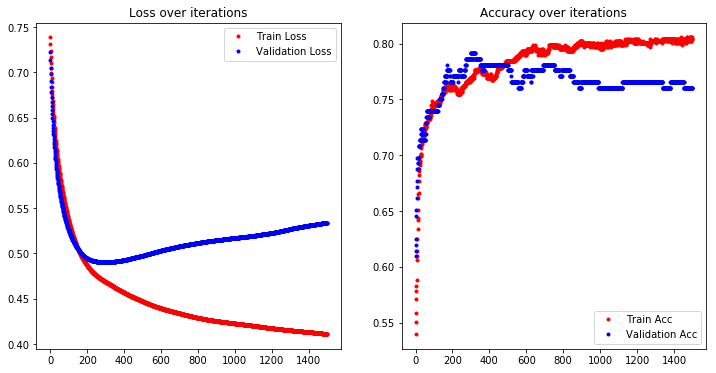


accuracy is 0.760
roc-auc is 0.805


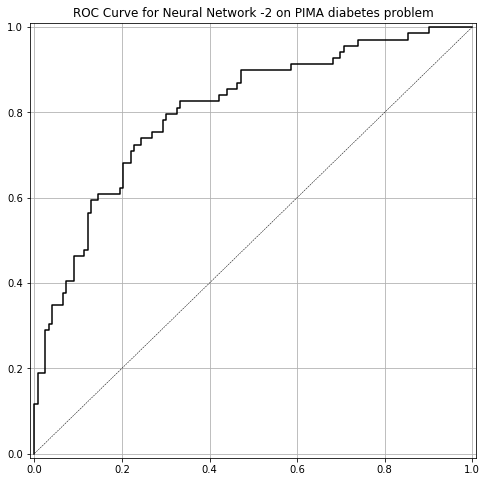

In [16]:

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["Outcome"].values

# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

print(np.mean(y), np.mean(1-y))
#35% of the patients in this dataset have diabetes, while 65% do not

## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

#observe
#accuracy is 0.776
#roc-auc is 0.830

def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    ax.figure
    plt.show()
plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forest')

## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Define the Model
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)
model_1 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_1.summary()

# Fit(Train) the Model
# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)
# the fit function returns the run history.
# It is very convenient, as it contains information about the model fit, iterations etc.
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
plot_roc(y_test, y_pred_prob_nn_1, 'Neural Network')

#observe
#accuracy is 0.734
#roc-auc is 0.789

run_hist_1.history.keys()
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")
ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")
ax.legend()
plt.show()

#model 2
model_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6,  activation="relu"),
    Dense(1, activation="sigmoid")
])
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

#Plot and observe
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["acc"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_acc"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')
plt.show()

#prediction
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))
plot_roc(y_test, y_pred_prob_nn_2, 'Neural Network -2')

#observe
#accuracy is 0.740
#roc-auc is 0.817